In [79]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 

In [82]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score, KFold, cross_validate, cross_val_predict
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import time
from sklearn.utils import resample

In [83]:
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# I. Đọc dữ liệu

In [84]:
df = pd.read_excel('data.xlsx')
df.head()

,ID khách hàng,Giới tính,Quốc tịch,Hóa đơn tiền điện,Số tiền vay,Mục đích vay,Gia đình,Thời gian tại công việc hiện tại,Tuổi,Tài sản đảm bảo,Nợ xấu,Khoảng cách đến điểm giao dịch gần nhất ( km ),Học vấn,Thời gian vay (tháng),Khả năng trả nợ
0,1,1. nam,1. Việt Nam,610000,600000000,2. mua nhà,1. Đã kết hôn,3. 3 năm,30,1. Thuộc sở hữu người vay,0. Không có nợ xấu,1. x<10,4. Khác,12,0. Trả nợ đúng hạn
1,2,2. nữ,1. Việt Nam,150000,50000000,4. học tập,2. Độc thân,1. 1 năm,23,0. Không thuộc sở hữu người vay,0. Không có nợ xấu,2. 10<x<20,2. Đại học,6,0. Trả nợ đúng hạn
2,3,2. nữ,2. Nước ngoài,300000,200000000,3. mua xe,2. Độc thân,2. 2 năm,28,1. Thuộc sở hữu người vay,0. Không có nợ xấu,3. 20<x<30,3. Trung học phổ thông,10,0. Trả nợ đúng hạn
3,4,2. nữ,1. Việt Nam,700000,150000000,5. đầu tư chứng khoán,1. Đã kết hôn,5. Trên 5 năm,32,1. Thuộc sở hữu người vay,0. Không có nợ xấu,3. 20<x<30,1. Cao học,12,0. Trả nợ đúng hạn
4,5,1. nam,1. Việt Nam,140000,300000000,3. mua xe,2. Độc thân,1. 1 năm,17,0. Không thuộc sở hữu người vay,1. Có nợ xấu,3. 20<x<30,4. Khác,4,1. Không trả nợ đúng hạn


In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   ID khách hàng                                    3000 non-null   int64 
 1   Giới tính                                        3000 non-null   object
 2   Quốc tịch                                        3000 non-null   object
 3   Hóa đơn tiền điện                                3000 non-null   int64 
 4   Số tiền vay                                      3000 non-null   int64 
 5   Mục đích vay                                     3000 non-null   object
 6   Gia đình                                         3000 non-null   object
 7   Thời gian tại công việc hiện tại                 3000 non-null   object
 8   Tuổi                                             3000 non-null   int64 
 9   Tài sản đảm bảo                          

In [86]:
df.shape
print('Dữ liệu có', df.shape[0],'dòng')
print('Dữ liệu có', df.shape[1],'cột')

Dữ liệu có 3000 dòng
Dữ liệu có 15 cột


# II. Chuyển đổi dữ liệu

In [87]:
for i in df.columns:
    df[i] = df[i].astype(str).apply(lambda x: x.split('.')[0])
    df[i] = df[i].astype(str).apply(lambda x: x.split(':')[0]) 
df 

,ID khách hàng,Giới tính,Quốc tịch,Hóa đơn tiền điện,Số tiền vay,Mục đích vay,Gia đình,Thời gian tại công việc hiện tại,Tuổi,Tài sản đảm bảo,Nợ xấu,Khoảng cách đến điểm giao dịch gần nhất ( km ),Học vấn,Thời gian vay (tháng),Khả năng trả nợ
0,1,1,1,610000,600000000,2,1,3,30,1,0,1,4,12,0
1,2,2,1,150000,50000000,4,2,1,23,0,0,2,2,6,0
2,3,2,2,300000,200000000,3,2,2,28,1,0,3,3,10,0
3,4,2,1,700000,150000000,5,1,5,32,1,0,3,1,12,0
4,5,1,1,140000,300000000,3,2,1,17,0,1,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,2,1,376000,577200000,2,3,5,34,1,0,1,4,12,0
2996,2997,1,1,336000,432500000,5,3,5,45,1,0,3,2,3,0
2997,2998,2,2,608000,390800000,4,2,2,25,0,0,2,4,15,1
2998,2999,1,2,664000,524800000,2,1,4,30,0,1,3,4,12,0


In [88]:
df = df.astype('int64') 

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                                           Non-Null Count  Dtype
---  ------                                           --------------  -----
 0   ID khách hàng                                    3000 non-null   int64
 1   Giới tính                                        3000 non-null   int64
 2   Quốc tịch                                        3000 non-null   int64
 3   Hóa đơn tiền điện                                3000 non-null   int64
 4   Số tiền vay                                      3000 non-null   int64
 5   Mục đích vay                                     3000 non-null   int64
 6   Gia đình                                         3000 non-null   int64
 7   Thời gian tại công việc hiện tại                 3000 non-null   int64
 8   Tuổi                                             3000 non-null   int64
 9   Tài sản đảm bảo                                  300

# III. Kiểm tra dữ liệu

##### Dữ liệu khuyết

In [90]:
# Phần trăm bị thiếu khuyết
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
# phần trăm khuyết = số lượng khuyết / tổng số dòng.
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

# # Visualization missing data
# f, ax = plt.subplots(figsize=(15, 6))
# plt.xticks(rotation='90')
# sns.barplot(x=missing_data.index, y=missing_data['Percent'])
# plt.xlabel('Cột quan sát', fontsize=15)
# plt.ylabel('Phần trăm dữ liệu bị thiếu khuyết', fontsize=15)
# plt.title('Phần trăm dữ liệu bị thuyết khuyết trong bộ dữ liệu', fontsize=20)
# plt.grid()
# missing_data

In [91]:
missing_data

,Total,Percent
ID khách hàng,0,0.0
Giới tính,0,0.0
Quốc tịch,0,0.0
Hóa đơn tiền điện,0,0.0
Số tiền vay,0,0.0
Mục đích vay,0,0.0
Gia đình,0,0.0
Thời gian tại công việc hiện tại,0,0.0
Tuổi,0,0.0
Tài sản đảm bảo,0,0.0


##### Dữ liệu bất hợp lý

In [92]:
df_test = df

In [93]:
# Khách hàng có độ tuổi không phù hợp để vay Ở Việt Nam, theo quy định của Ngân hàng Nhà nước Việt Nam, 
# độ tuổi tối thiểu để vay nợ tín dụng là 18 tuổi đối với người cá nhân và từ 15 tuổi đối với doanh nghiệp. 
# Tuy nhiên, độ tuổi này có thể khác nhau tùy vào chính sách và quy định của từng ngân hàng hoặc tổ chức tài chính cụ thể. 
# Ngoài độ tuổi, các yêu cầu khác như thu nhập, tiền gửi và lịch sử tín dụng cũng sẽ được xem xét để xác định khả năng vay nợ của khách hàng.

df_18 = df[df['Tuổi'] <= 18]
df_18 

,ID khách hàng,Giới tính,Quốc tịch,Hóa đơn tiền điện,Số tiền vay,Mục đích vay,Gia đình,Thời gian tại công việc hiện tại,Tuổi,Tài sản đảm bảo,Nợ xấu,Khoảng cách đến điểm giao dịch gần nhất ( km ),Học vấn,Thời gian vay (tháng),Khả năng trả nợ
4,5,1,1,140000,300000000,3,2,1,17,0,1,3,4,4,1
52,53,1,1,264000,167400000,3,2,1,17,0,1,3,4,4,1
89,90,1,1,608000,396400000,3,2,1,17,0,1,3,4,4,1
137,138,1,1,416000,172000000,3,2,1,17,0,1,3,4,4,1
204,205,1,1,592000,462900000,3,2,1,17,0,1,3,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2782,2783,1,1,504000,376100000,3,2,1,17,0,1,3,4,4,0
2830,2831,1,1,592000,485100000,3,2,1,17,0,1,3,4,12,1
2865,2866,1,1,432000,460600000,5,2,1,17,0,1,3,2,4,1
2913,2914,1,1,648000,324900000,3,2,1,17,0,0,4,4,4,0


In [94]:
#### Lấy dữ liệu khách hàng đủ điều kiện

df = df[df['Tuổi'] > 18]
df

,ID khách hàng,Giới tính,Quốc tịch,Hóa đơn tiền điện,Số tiền vay,Mục đích vay,Gia đình,Thời gian tại công việc hiện tại,Tuổi,Tài sản đảm bảo,Nợ xấu,Khoảng cách đến điểm giao dịch gần nhất ( km ),Học vấn,Thời gian vay (tháng),Khả năng trả nợ
0,1,1,1,610000,600000000,2,1,3,30,1,0,1,4,12,0
1,2,2,1,150000,50000000,4,2,1,23,0,0,2,2,6,0
2,3,2,2,300000,200000000,3,2,2,28,1,0,3,3,10,0
3,4,2,1,700000,150000000,5,1,5,32,1,0,3,1,12,0
5,6,2,1,350000,500000000,2,3,5,40,0,1,2,2,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,2,1,376000,577200000,2,3,5,34,1,0,1,4,12,0
2996,2997,1,1,336000,432500000,5,3,5,45,1,0,3,2,3,0
2997,2998,2,2,608000,390800000,4,2,2,25,0,0,2,4,15,1
2998,2999,1,2,664000,524800000,2,1,4,30,0,1,3,4,12,0


In [95]:
print('Dữ liệu khách hàng còn lại sau khi loại bỏ những khách hàng không đủ điều kiện là:', df.shape[0]/df_test.shape[0]*100 ,'%')

Dữ liệu khách hàng còn lại sau khi loại bỏ những khách hàng không đủ điều kiện là: 97.8 %


# IV. Thống kê mô tả

In [96]:
df.describe().drop(columns=['ID khách hàng'])

,Giới tính,Quốc tịch,Hóa đơn tiền điện,Số tiền vay,Mục đích vay,Gia đình,Thời gian tại công việc hiện tại,Tuổi,Tài sản đảm bảo,Nợ xấu,Khoảng cách đến điểm giao dịch gần nhất ( km ),Học vấn,Thời gian vay (tháng),Khả năng trả nợ
count,2934.000000,2934.000000,2934.000000,2.934000e+03,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000,2934.000000
mean,1.524540,1.136673,439477.164281,3.058056e+08,3.060668,1.881050,3.758010,33.294479,0.670416,0.390593,2.589639,2.585549,7.882754,0.291411
std,0.499483,0.343561,205596.496872,1.692276e+08,1.300319,0.795805,1.171631,5.350312,0.470142,0.487966,0.993316,1.153720,3.899595,0.454490
min,1.000000,1.000000,88000.000000,1.120000e+07,1.000000,1.000000,1.000000,23.000000,0.000000,0.000000,1.000000,1.000000,3.000000,0.000000
25%,1.000000,1.000000,264000.000000,1.615500e+08,2.000000,1.000000,3.000000,30.000000,0.000000,0.000000,2.000000,2.000000,5.000000,0.000000
50%,2.000000,1.000000,432000.000000,3.021500e+08,3.000000,2.000000,4.000000,32.000000,1.000000,0.000000,2.000000,2.000000,8.000000,0.000000
75%,2.000000,1.000000,616000.000000,4.500000e+08,4.000000,3.000000,5.000000,36.000000,1.000000,1.000000,3.000000,4.000000,12.000000,1.000000
max,2.000000,2.000000,800000.000000,6.000000e+08,5.000000,3.000000,5.000000,45.000000,1.000000,1.000000,4.000000,4.000000,15.000000,1.000000


##### Mức độ tương quan giữa các biến

In [97]:
df_corr = pd.DataFrame(df.corr().iloc[1:,-1]).drop(index=['Khả năng trả nợ'])
df_corr 

,Khả năng trả nợ
Giới tính,0.158479
Quốc tịch,-0.178735
Hóa đơn tiền điện,0.026713
Số tiền vay,-0.015683
Mục đích vay,-0.095117
Gia đình,-0.007822
Thời gian tại công việc hiện tại,-0.111472
Tuổi,-0.129945
Tài sản đảm bảo,-0.314669
Nợ xấu,0.410539


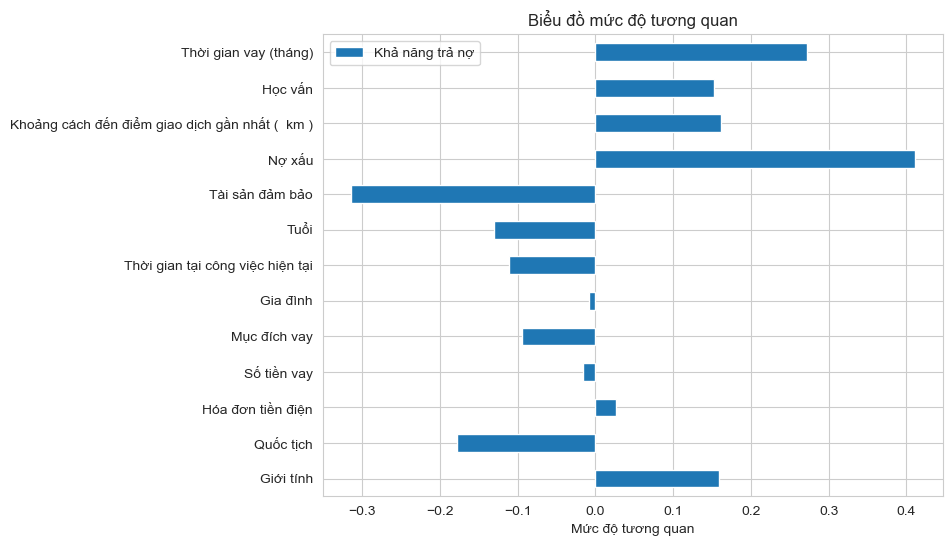

In [98]:
ax = df_corr.plot.barh(figsize=(8, 6))
ax.set_xlabel('Mức độ tương quan')
ax.set_title('Biểu đồ mức độ tương quan')

plt.show()

##### Dữ liệu ngoại lai

In [99]:
df.columns 

Index(['ID khách hàng', 'Giới tính', 'Quốc tịch', 'Hóa đơn tiền điện',
       'Số tiền vay', 'Mục đích vay', 'Gia đình',
       'Thời gian tại công việc hiện tại', 'Tuổi', 'Tài sản đảm bảo', 'Nợ xấu',
       'Khoảng cách đến điểm giao dịch gần nhất (  km )', 'Học vấn',
       'Thời gian vay (tháng)', 'Khả năng trả nợ'],
      dtype='object')

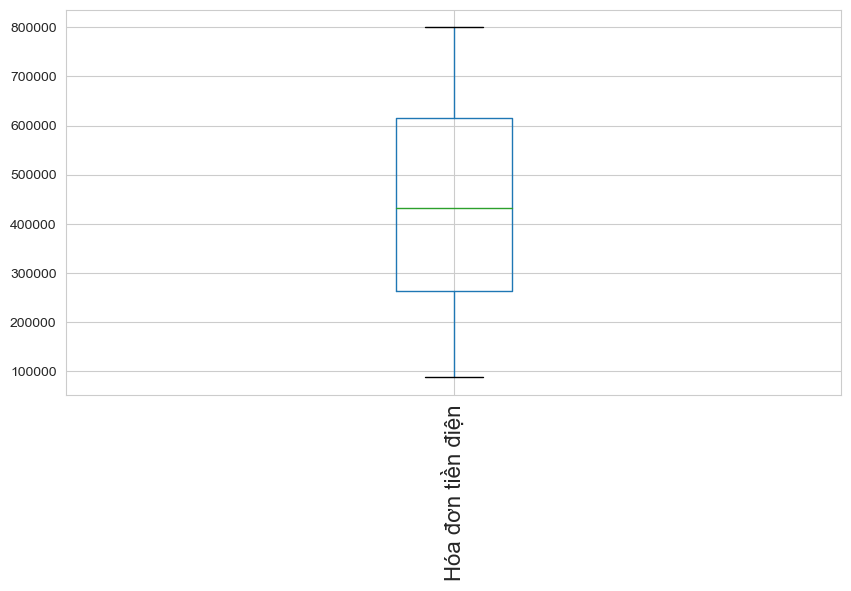

In [100]:
#Using boxplot to detect outliers
boxplot = df.boxplot(column=['Hóa đơn tiền điện'], figsize=(10,5), rot=90)
boxplot.tick_params(axis='x', labelsize=16)

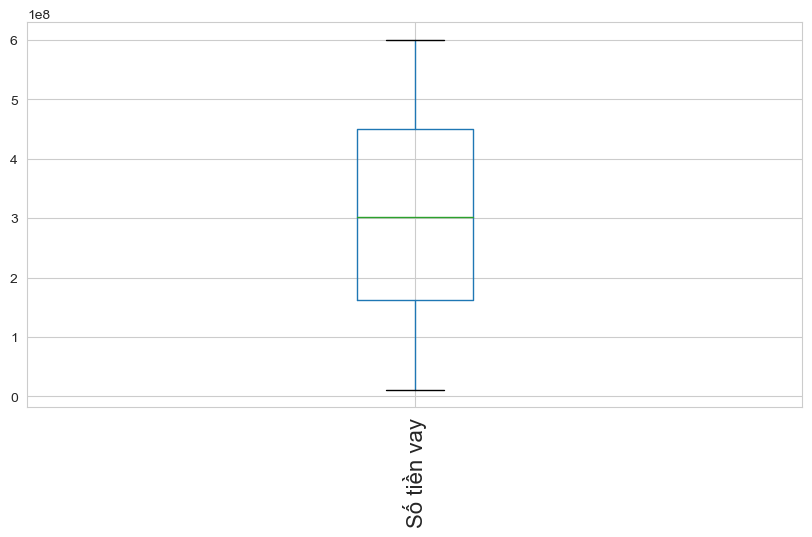

In [101]:
#Using boxplot to detect outliers
boxplot = df.boxplot(column=['Số tiền vay'],figsize=(10,5), rot=90)
boxplot.tick_params(axis='x', labelsize=16)

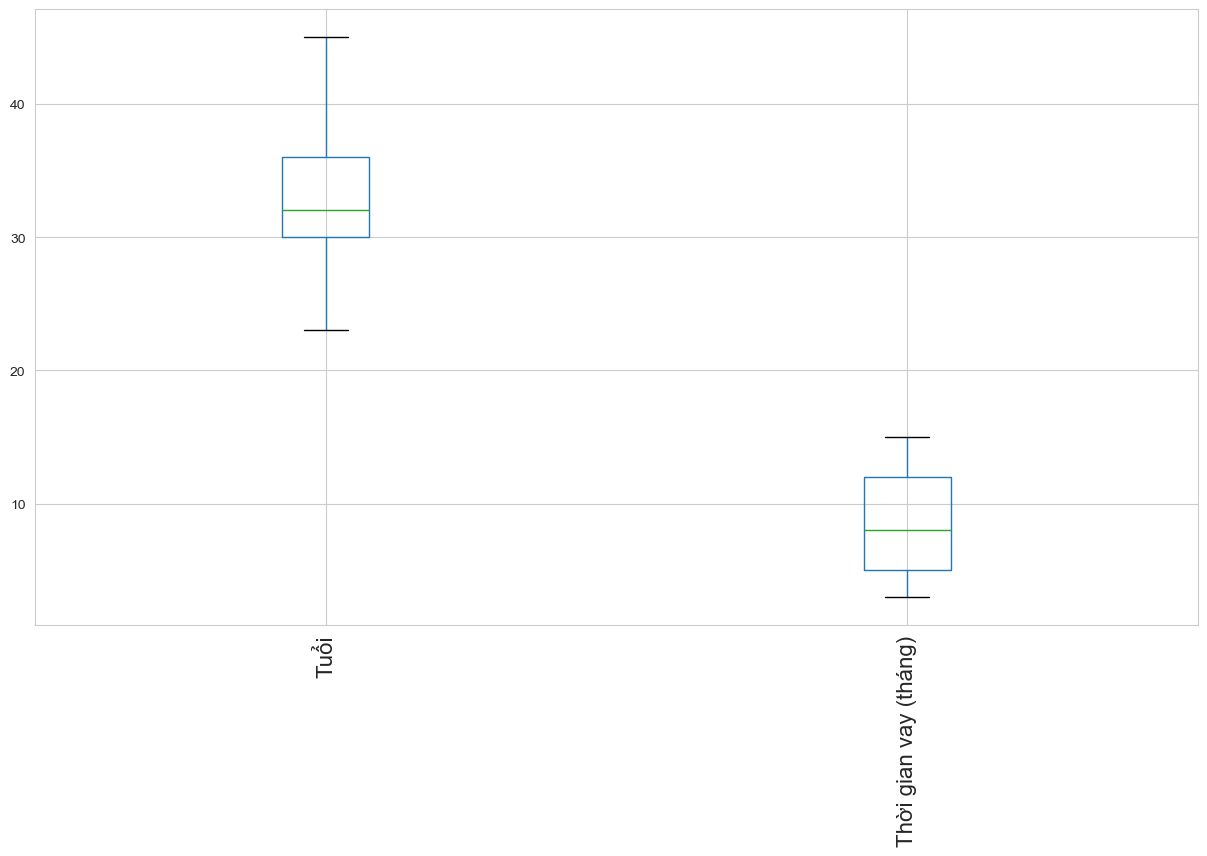

In [102]:
#Using boxplot to detect outliers
boxplot = df.boxplot(column=['Tuổi','Thời gian vay (tháng)'], figsize=(15,8), rot=90)
boxplot.tick_params(axis='x', labelsize=16)

##### Visualization

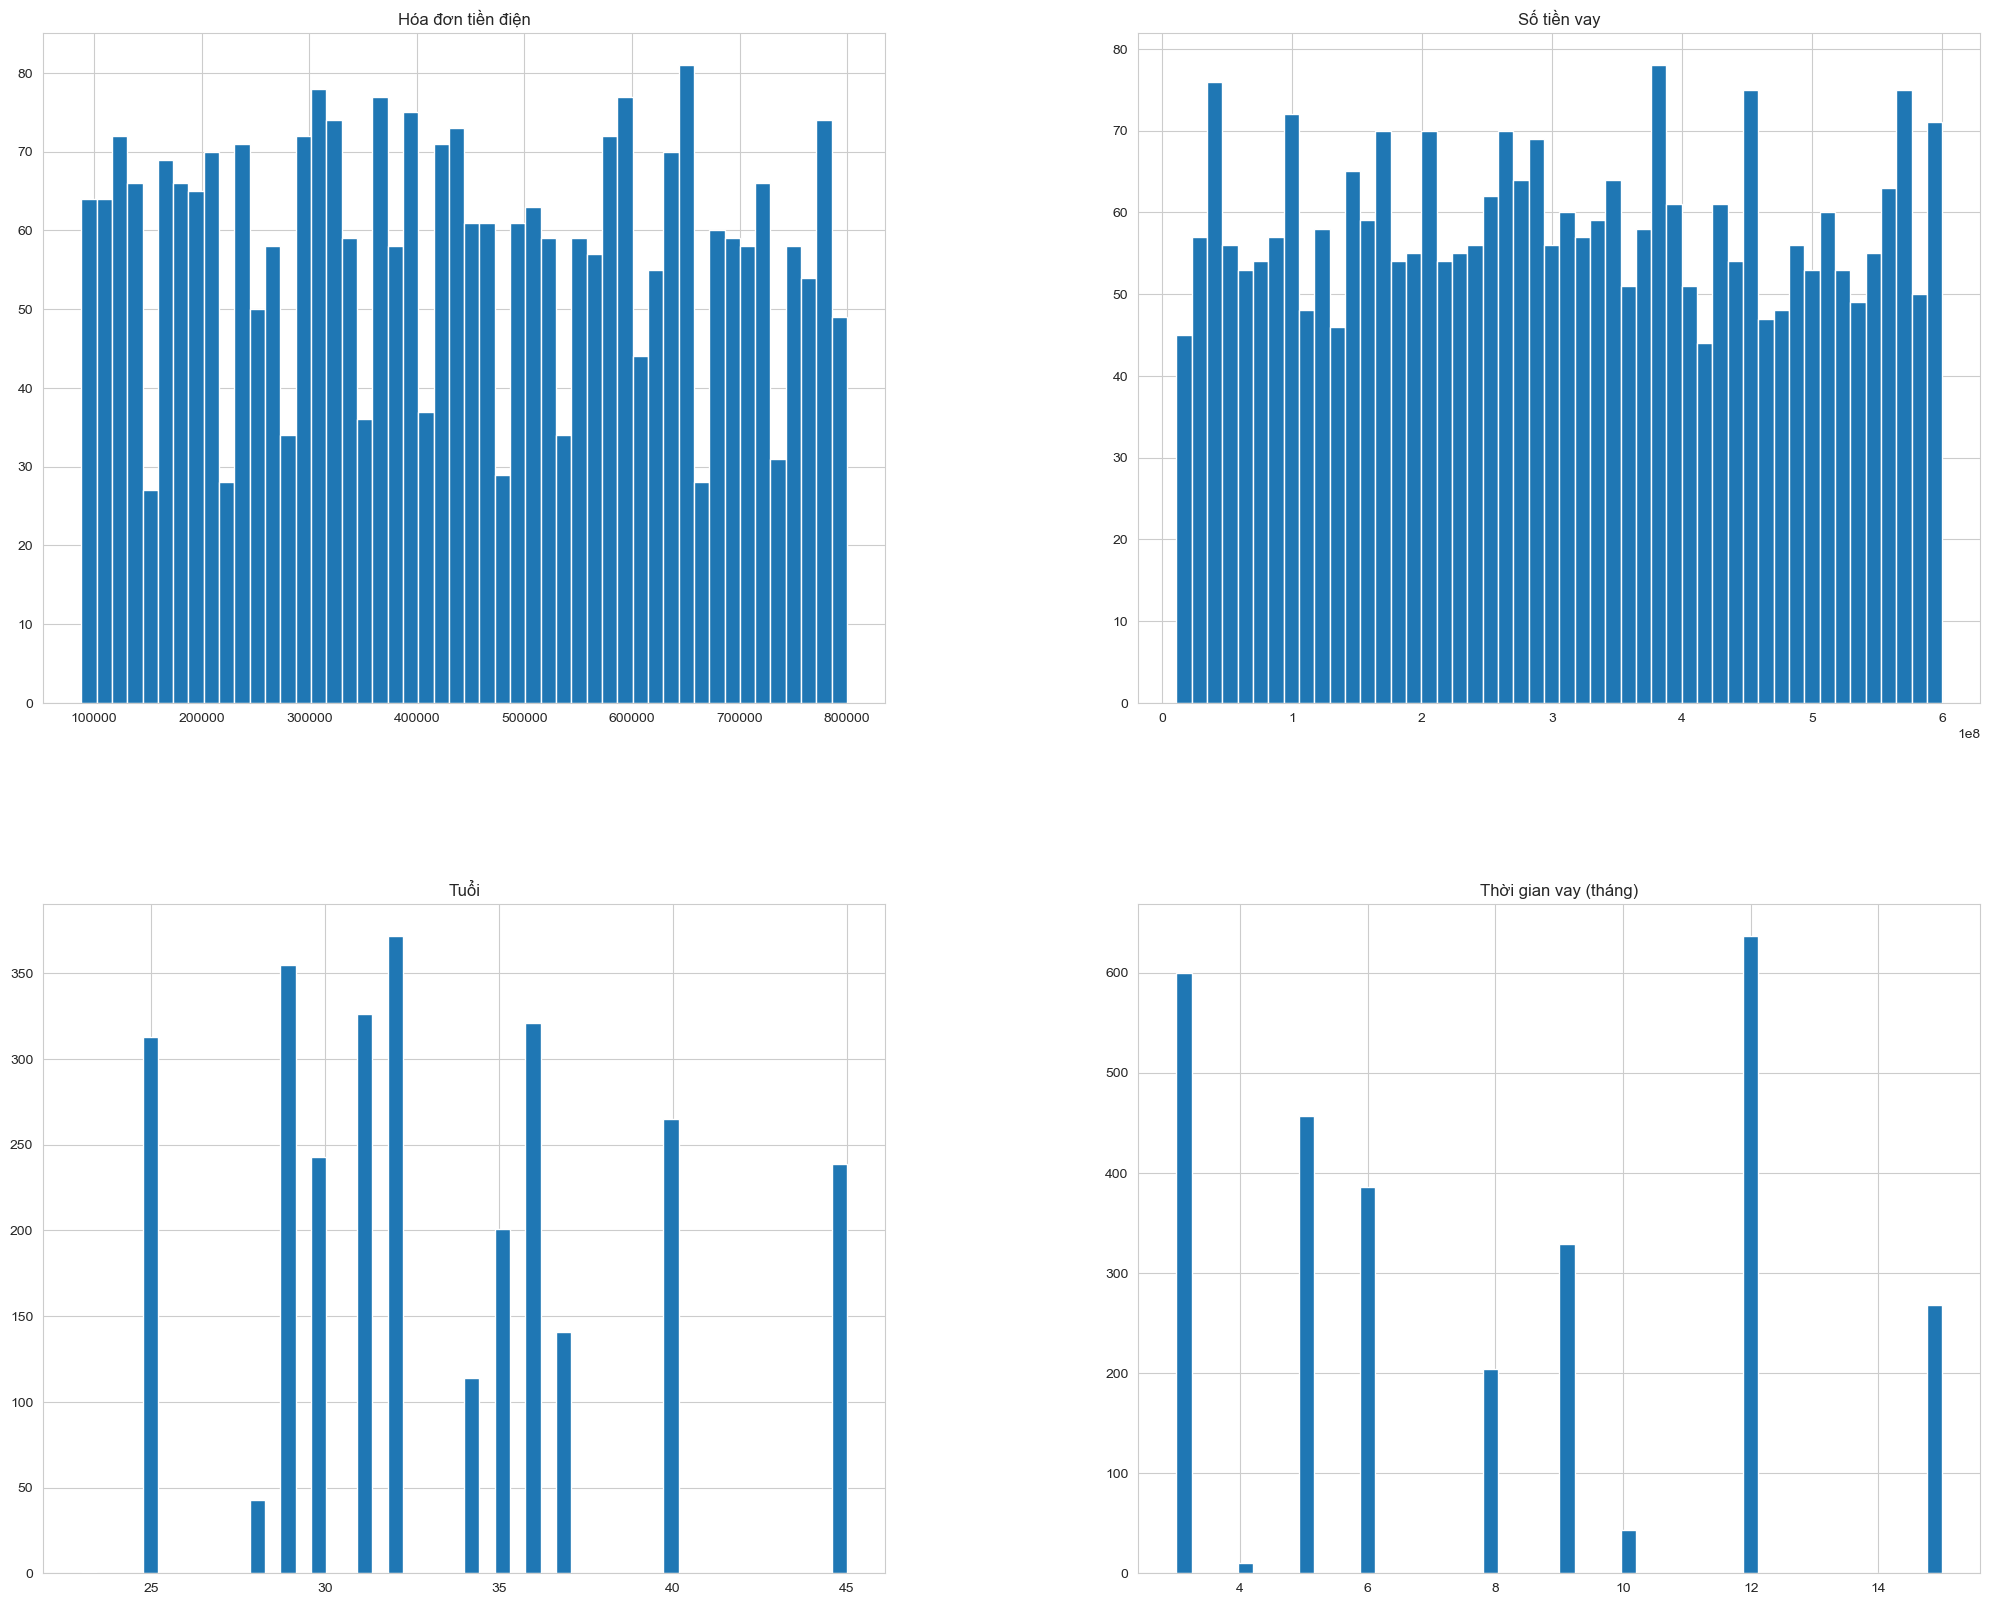

In [103]:
%matplotlib inline
#Creating histogram for numerical attributes
df.hist(column=['Hóa đơn tiền điện','Số tiền vay','Tuổi','Thời gian vay (tháng)'],bins=50, figsize=(25,20))
plt.show()

In [104]:
df.columns

Index(['ID khách hàng', 'Giới tính', 'Quốc tịch', 'Hóa đơn tiền điện',
       'Số tiền vay', 'Mục đích vay', 'Gia đình',
       'Thời gian tại công việc hiện tại', 'Tuổi', 'Tài sản đảm bảo', 'Nợ xấu',
       'Khoảng cách đến điểm giao dịch gần nhất (  km )', 'Học vấn',
       'Thời gian vay (tháng)', 'Khả năng trả nợ'],
      dtype='object')

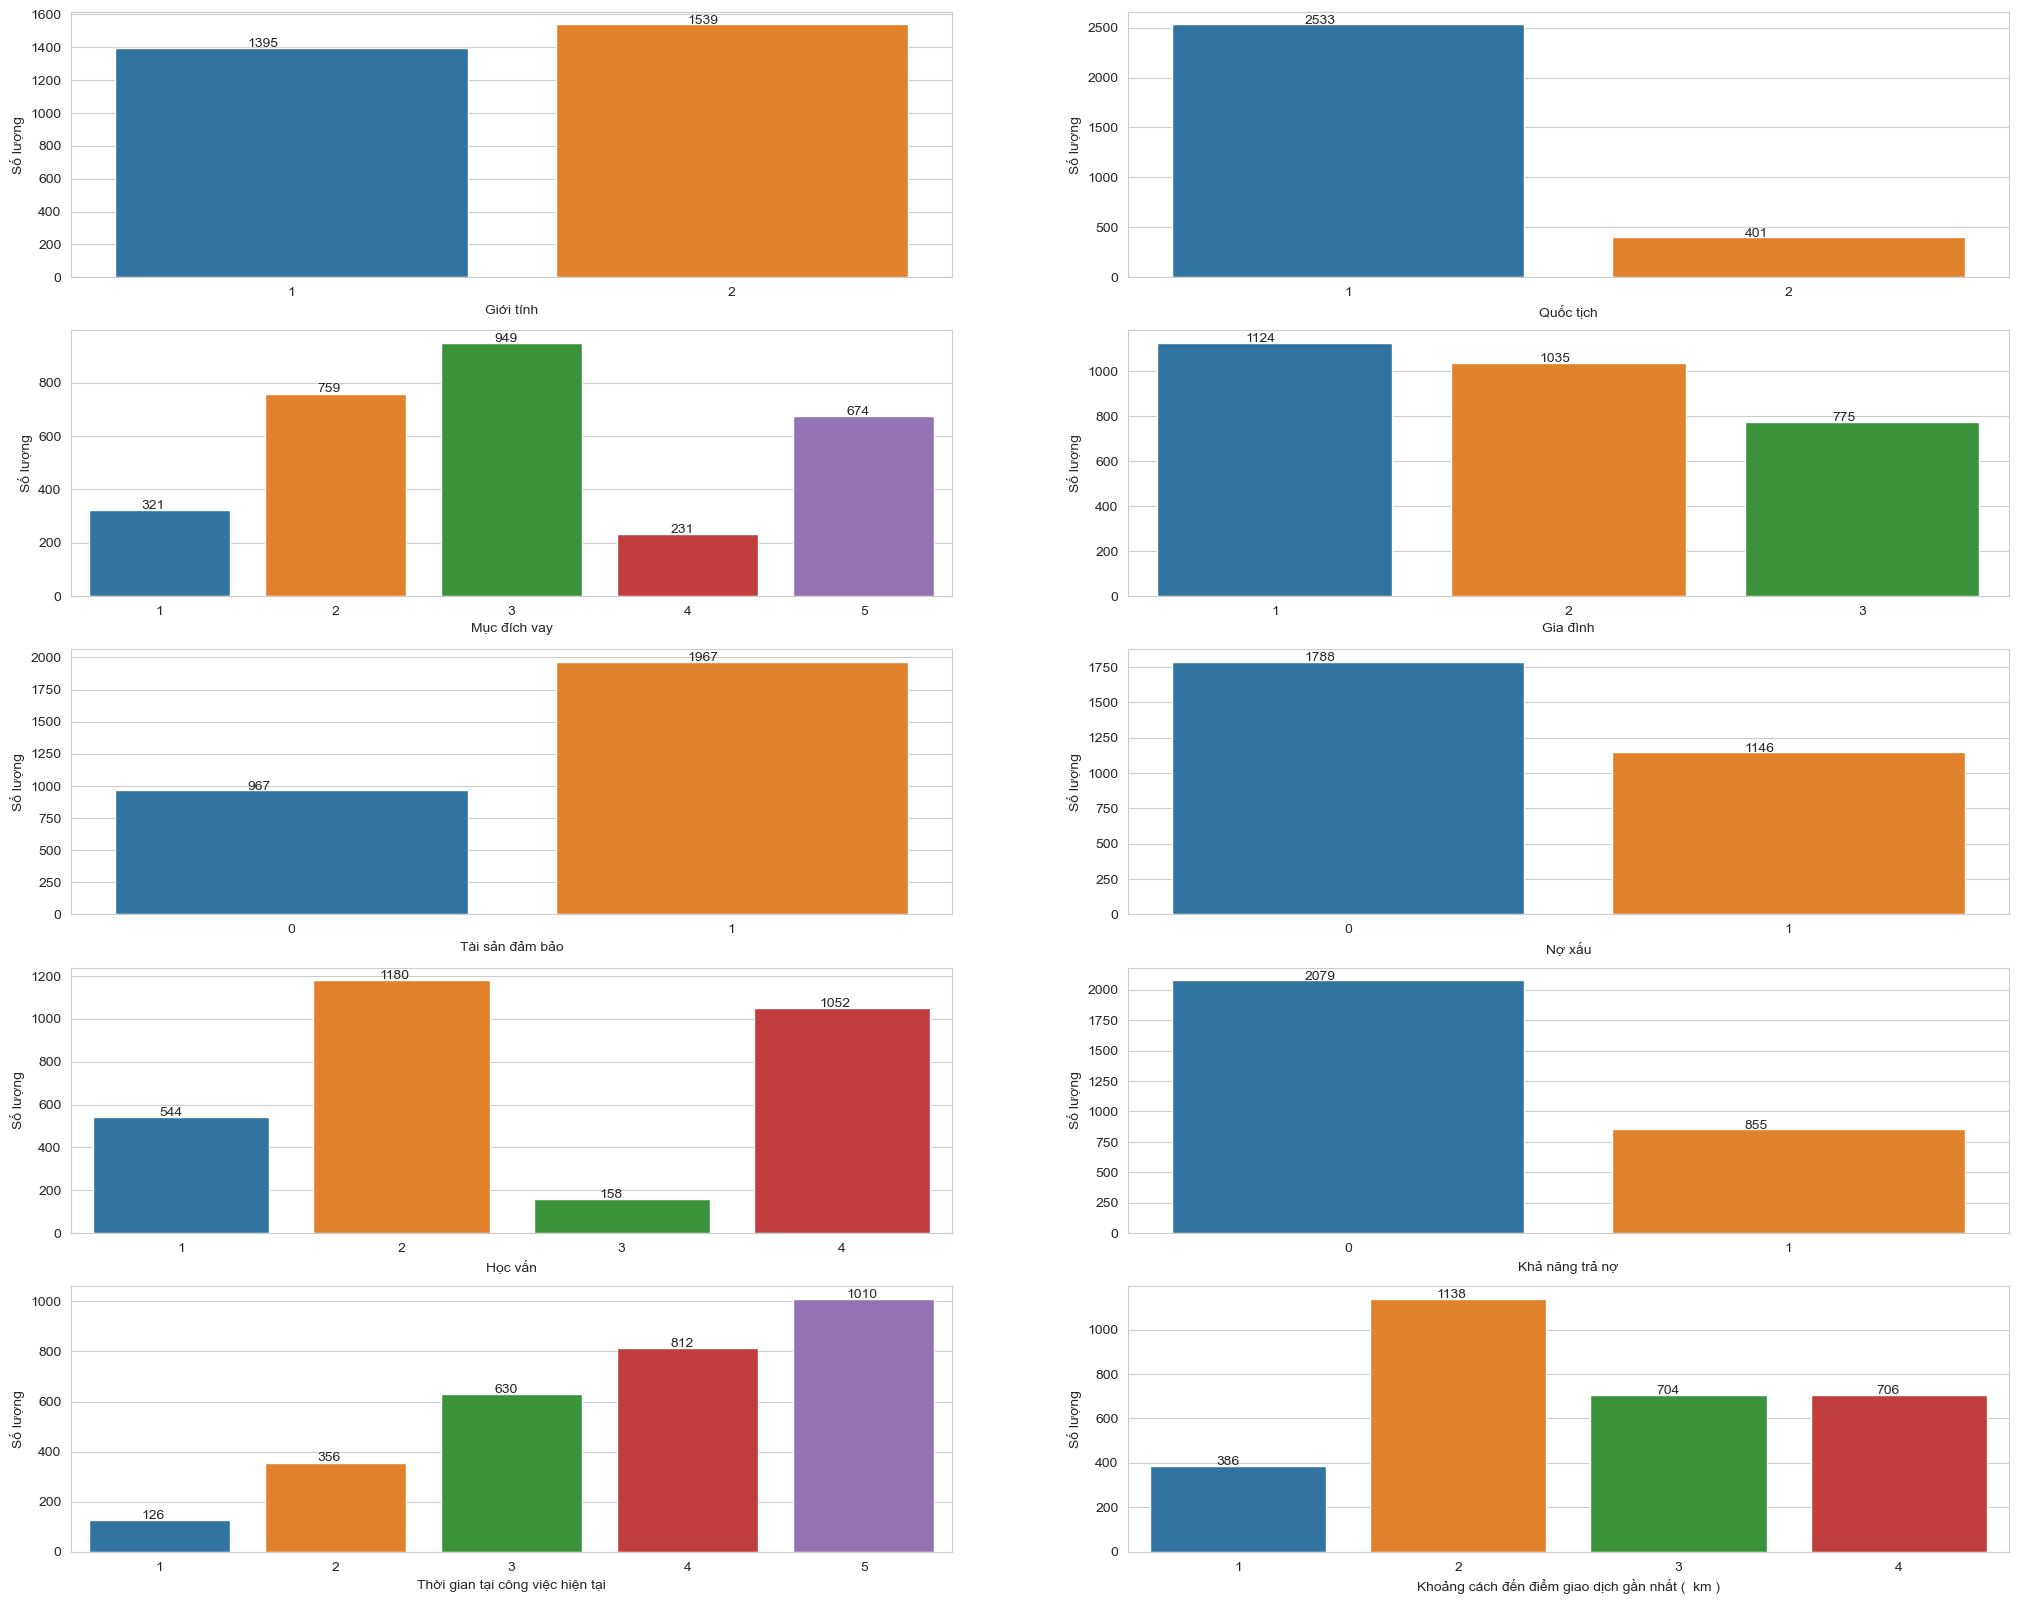

In [105]:
sns.set_style('whitegrid') # thiết lập kiểu style cho plot

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(25, 20)) # tạo một grid 4x2 plot

sns.countplot(x='Giới tính', data=df, ax=axes[0,0])
axes[0,0].set_ylabel('Số lượng')
for p in axes[0,0].patches:
    axes[0,0].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

sns.countplot(x='Quốc tịch', data=df, ax=axes[0,1])
axes[0,1].set_ylabel('Số lượng')
for p in axes[0,1].patches:
    axes[0,1].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

sns.countplot(x='Mục đích vay', data=df, ax=axes[1,0])
axes[1,0].set_ylabel('Số lượng')
for p in axes[1,0].patches:
    axes[1,0].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

sns.countplot(x='Gia đình', data=df, ax=axes[1,1])
axes[1,1].set_ylabel('Số lượng')
for p in axes[1,1].patches:
    axes[1,1].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

sns.countplot(x='Tài sản đảm bảo', data=df, ax=axes[2,0])
axes[2,0].set_ylabel('Số lượng')
for p in axes[2,0].patches:
    axes[2,0].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

sns.countplot(x='Nợ xấu', data=df, ax=axes[2,1])
axes[2,1].set_ylabel('Số lượng')
for p in axes[2,1].patches:
    axes[2,1].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

sns.countplot(x='Học vấn', data=df, ax=axes[3,0])
axes[3,0].set_ylabel('Số lượng')
for p in axes[3,0].patches:
    axes[3,0].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

sns.countplot(x='Khả năng trả nợ', data=df, ax=axes[3,1])
axes[3,1].set_ylabel('Số lượng')
for p in axes[3,1].patches:
    axes[3,1].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

sns.countplot(x='Thời gian tại công việc hiện tại', data=df, ax=axes[4,0])
axes[4,0].set_ylabel('Số lượng')
for p in axes[4,0].patches:
    axes[4,0].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))

sns.countplot(x='Khoảng cách đến điểm giao dịch gần nhất (  km )', data=df, ax=axes[4,1])
axes[4,1].set_ylabel('Số lượng')
for p in axes[4,1].patches:
    axes[4,1].annotate(p.get_height(), (p.get_x()+0.3, p.get_height()+5))    

plt.show()

In [106]:
df[['Giới tính']].value_counts()

Giới tính
2            1539
1            1395
dtype: int64

In [107]:
gender_debt = df.groupby(['Khả năng trả nợ','Giới tính']).agg( Count = ( 'Giới tính','count' )).reset_index()
gender_debt

,Khả năng trả nợ,Giới tính,Count
0,0,1,1094
1,0,2,985
2,1,1,301
3,1,2,554


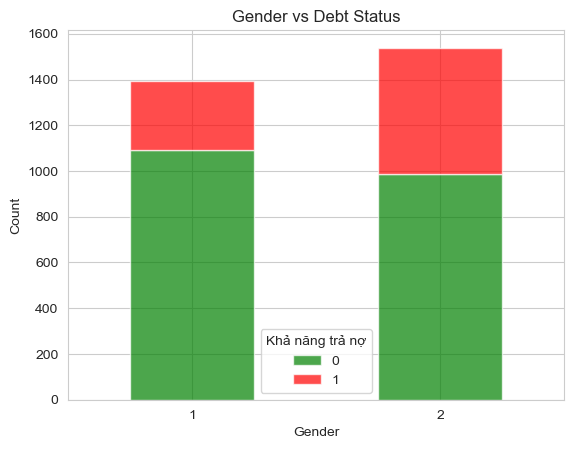

Khả năng trả nợ,0,1
Giới tính,,
1,1094,301
2,985,554


In [108]:
# Groupby dữ liêu theo điều kiện
gender_debt = df.groupby(['Khả năng trả nợ','Giới tính']).agg( Count = ( 'Giới tính','count' )).reset_index()
gender_debt

# Tạo pivot table để định dạng lại dữ liệu
pivot = pd.pivot_table(gender_debt, values='Count', index='Giới tính', columns='Khả năng trả nợ')

# Vẽ biểu đồ cột
pivot.plot(kind='bar', stacked=True, color=['green', 'red'], alpha=0.7)

# Đặt tiêu đề, nhãn trục
plt.title('Gender vs Debt Status')
plt.xlabel('Gender')
plt.ylabel('Count')

# Định dạng trục x
plt.xticks(np.arange(len(pivot.index)), pivot.index, rotation=0)

# Hiển thị biểu đồ
plt.show()
pivot

##### Kiểm tra biến mục tiêu

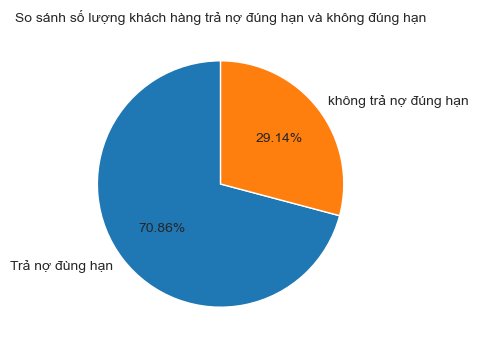

In [109]:
df_dept = df['Khả năng trả nợ'].value_counts()

fig, ax = plt.subplots(figsize=(6, 4))
ax.pie(df_dept, labels=['Trả nợ đùng hạn','không trả nợ đúng hạn' ], autopct='%2.2f%%', startangle=90)
plt.title("So sánh số lượng khách hàng trả nợ đúng hạn và không đúng hạn", size =10)
plt.show()

In [110]:
# Dữ liệu bị vấn đề mất cân bằng. Oversampling được sử dụng để tăng số lượng mẫu cho lớp thiểu số, 
# undersampling là phương pháp giảm số lượng mẫu cho lớp đa số. 
# Trong trường hợp này, vì lớp thiểu số có số lượng mẫu ít hơn nhiều so với lớp đa số vì vậy sử dụng phương pháp oversampling.

In [111]:
class_0 = df[df['Khả năng trả nợ'] == 0]
class_1 = df[df['Khả năng trả nợ'] == 1]
class_1_oversampled = resample(class_1,
                               replace=True,     # lấy mẫu có thay thế
                               n_samples=len(class_0),  # số lượng mẫu lấy mẫu bằng số lượng mẫu của lớp 0
                               random_state=42)  # để kết quả phù hợp

# Ghép hai lớp lại
balanced_data = pd.concat([class_0, class_1_oversampled])

# Kiểm tra lại số lượng quan sát của mỗi lớp
print(balanced_data['Khả năng trả nợ'].value_counts()) 

0    2079
1    2079
Name: Khả năng trả nợ, dtype: int64


# Chuẩn bị dữ liệu cho mô hình

In [112]:
balanced_data = balanced_data.drop(columns=['ID khách hàng']) 
df = df.drop(columns=['ID khách hàng']) 

In [113]:
target = ['Khả năng trả nợ']
features = list(set(list(balanced_data.columns)) - set(target))

print('Target: ', target)
print('Features: ', features)

Target:  ['Khả năng trả nợ']
Features:  ['Số tiền vay', 'Tuổi', 'Giới tính', 'Gia đình', 'Tài sản đảm bảo', 'Hóa đơn tiền điện', 'Mục đích vay', 'Nợ xấu', 'Khoảng cách đến điểm giao dịch gần nhất (  km )', 'Thời gian vay (tháng)', 'Học vấn', 'Quốc tịch', 'Thời gian tại công việc hiện tại']


In [114]:
X = balanced_data[features].values
y = balanced_data[target].values 

X_ = df[features].values
y_ = df[target].values 

In [115]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)

scaler = StandardScaler()
X_ = scaler.fit_transform(X_)

# Chạy Decision tree với dữ liệu không cân bằng

In [116]:
X_ = df[features].values
y_ = df[target].values
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = 0.1, random_state=42)

In [117]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred)) 

[[185  24]
 [ 21  64]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.89       209
           1       0.73      0.75      0.74        85

    accuracy                           0.85       294
   macro avg       0.81      0.82      0.82       294
weighted avg       0.85      0.85      0.85       294

Decision Tree accuracy:  0.8469387755102041


# Chạy Decision tree với dữ liệu cân bằng

In [118]:
X = balanced_data[features].values
y = balanced_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42) 

In [119]:
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

[[198  33]
 [  6 179]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       231
           1       0.84      0.97      0.90       185

    accuracy                           0.91       416
   macro avg       0.91      0.91      0.91       416
weighted avg       0.91      0.91      0.91       416

Decision Tree accuracy:  0.90625


##### Các biến quan trọng

In [120]:
importance_dt = DT_classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': balanced_data.columns[0:len(balanced_data.columns)-1], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
0,Giới tính,0.188146
9,Nợ xấu,0.186146
7,Tuổi,0.184946
5,Gia đình,0.141315
4,Mục đích vay,0.092382
1,Quốc tịch,0.078407
6,Thời gian tại công việc hiện tại,0.043108
8,Tài sản đảm bảo,0.033412
10,Khoảng cách đến điểm giao dịch gần nhất ( km ),0.016814
12,Thời gian vay (tháng),0.014739


<AxesSubplot:ylabel='FeatureName'>

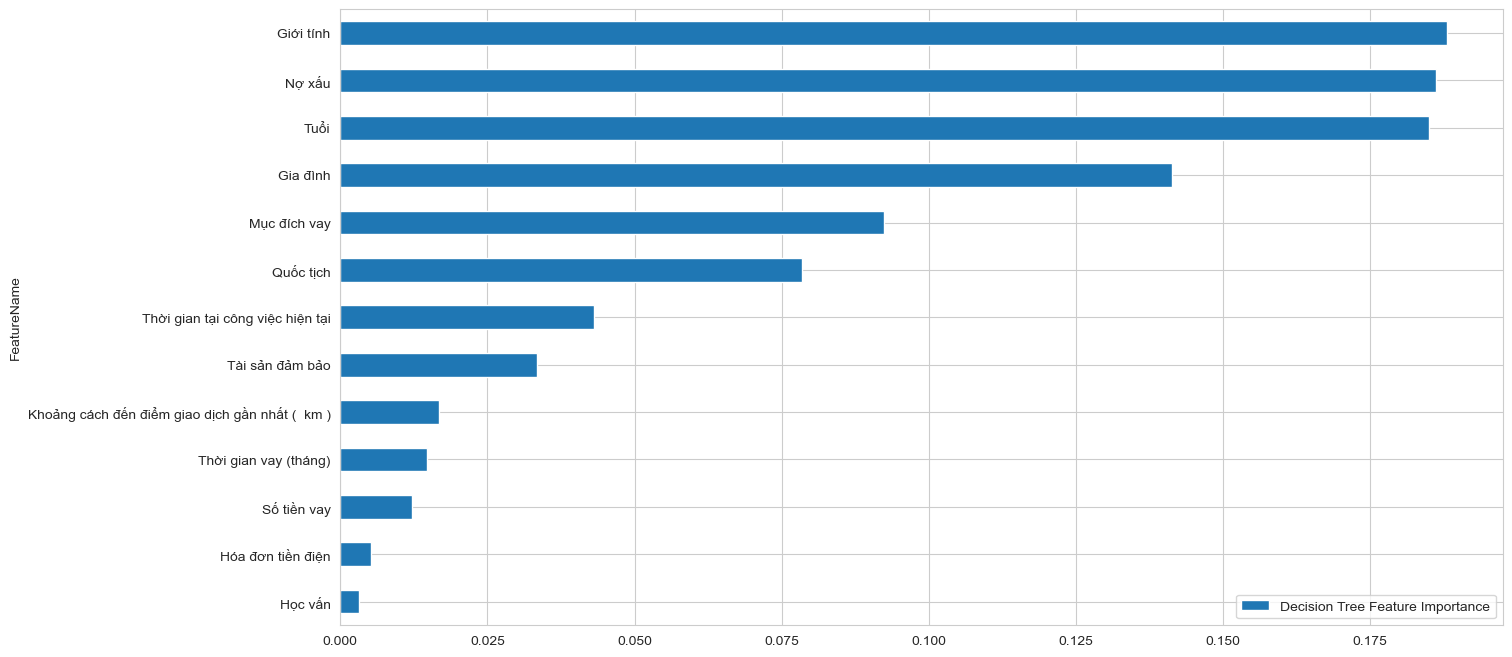

In [121]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

##### Roc_curve

In [122]:
from sklearn.metrics import roc_curve, auc

def _plot_roc_curve(fpr, tpr, thres, auc):
    plt.figure(figsize = (10, 8))
    plt.plot(fpr, tpr, 'b-', color='darkorange', lw=2, linestyle='--', label='ROC curve (area = %0.2f)'%auc)
    plt.plot([0, 1], [0, 1], '--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.title('ROC Curve')

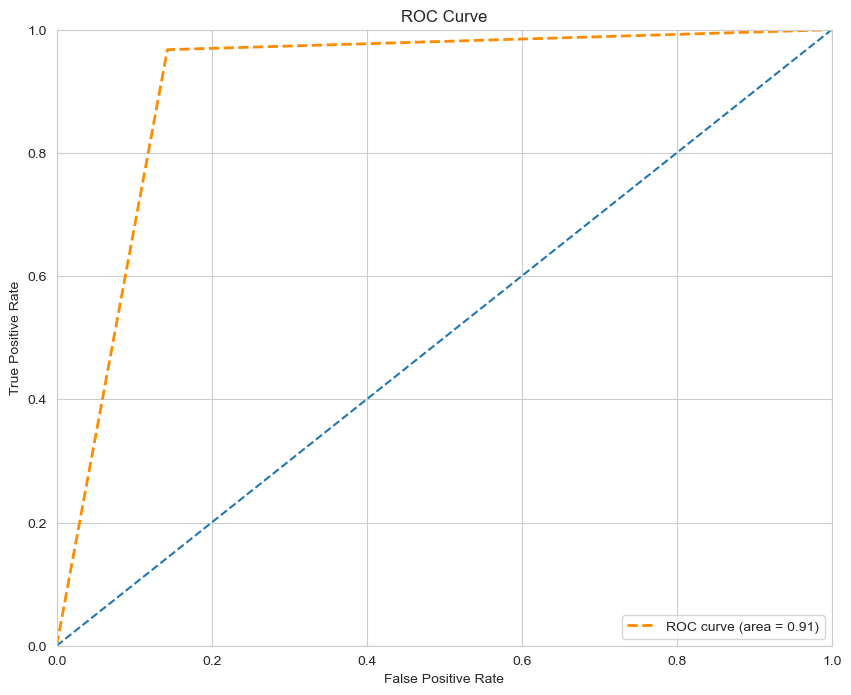

In [123]:
y_pred_prob_test = DT_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

##### Vẽ cây quyết định

In [124]:
# Kiểm tra định nghĩa biến mục tiêu
balanced_data['Khả năng trả nợ'].unique()

array([0, 1], dtype=int64)

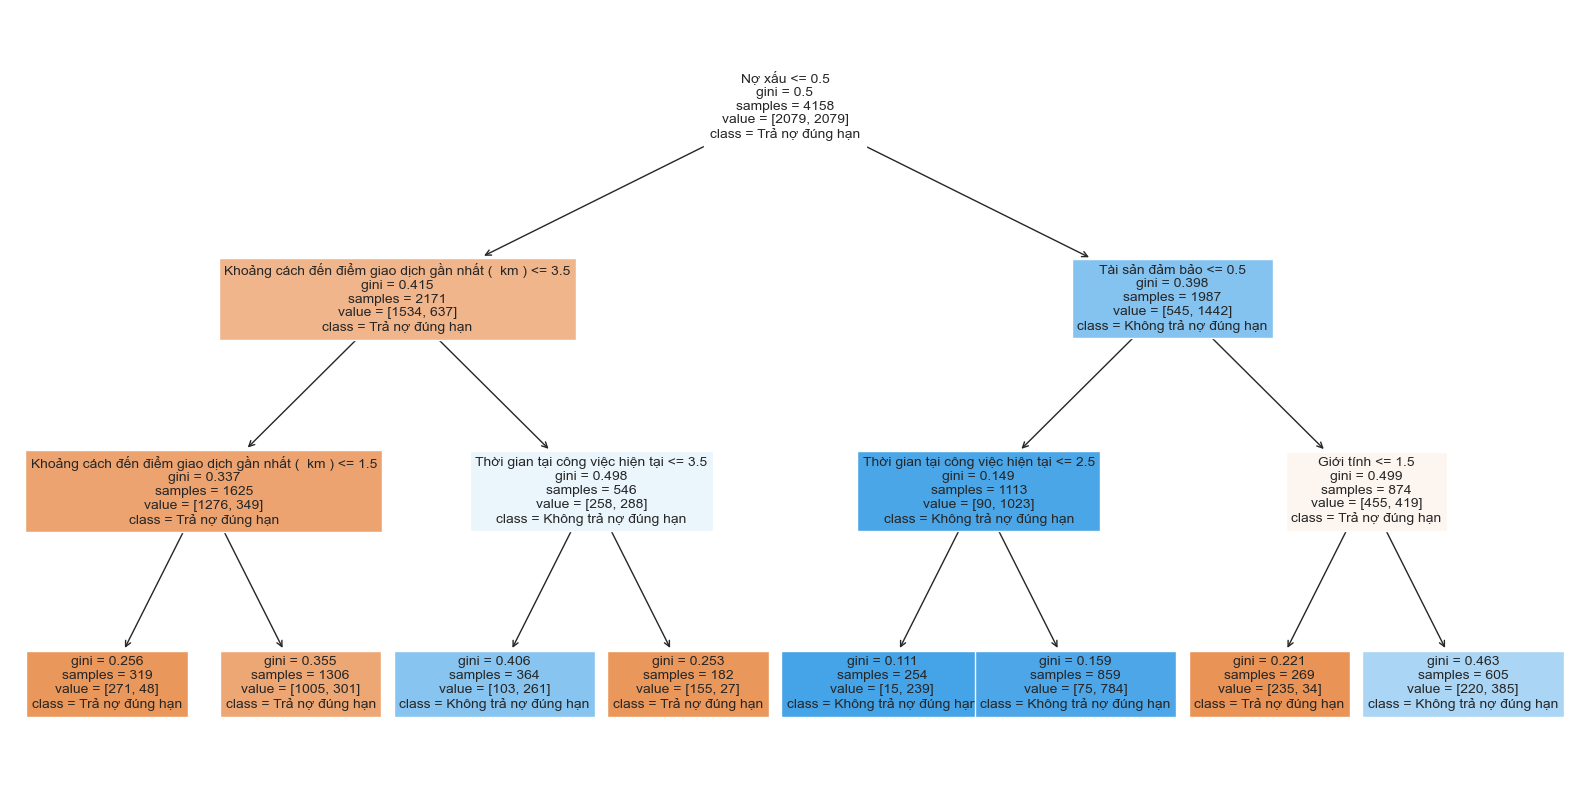

In [125]:
# Chọn các biến đầu vào và biến đầu ra
X_tree = balanced_data[['Nợ xấu','Học vấn','Khoảng cách đến điểm giao dịch gần nhất (  km )','Giới tính','Tài sản đảm bảo','Thời gian tại công việc hiện tại']]
y_tree = balanced_data['Khả năng trả nợ']

# Tên các biến đầu vào
features = ['Nợ xấu','Học vấn','Khoảng cách đến điểm giao dịch gần nhất (  km )','Giới tính','Tài sản đảm bảo','Thời gian tại công việc hiện tại']

# Tạo một bộ phân loại Decision Tree với các biến được chọn
clf = DecisionTreeClassifier(max_depth=3)

# Huấn luyện mô hình với dữ liệu đầu vào và nhãn đầu ra
clf.fit(X_tree, y_tree)

# Vẽ cây decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, fontsize=10, filled=True, feature_names=features, class_names=["Trả nợ đúng hạn","Không trả nợ đúng hạn"])
plt.show()

# Random Forest

In [126]:
target = ['Khả năng trả nợ']
features = list(set(list(balanced_data.columns)) - set(target))

print('Target: ', target)
print('Features: ', features)

X = balanced_data[features].values
y = balanced_data[target].values 

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)


X = balanced_data[features].values
y = balanced_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42) 

Target:  ['Khả năng trả nợ']
Features:  ['Số tiền vay', 'Tuổi', 'Giới tính', 'Gia đình', 'Tài sản đảm bảo', 'Hóa đơn tiền điện', 'Mục đích vay', 'Nợ xấu', 'Khoảng cách đến điểm giao dịch gần nhất (  km )', 'Thời gian vay (tháng)', 'Học vấn', 'Quốc tịch', 'Thời gian tại công việc hiện tại']


In [127]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

y_pred = RF_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Random Forest accuracy: ', accuracy_score(y_test, y_pred))

[[210  21]
 [  5 180]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       231
           1       0.90      0.97      0.93       185

    accuracy                           0.94       416
   macro avg       0.94      0.94      0.94       416
weighted avg       0.94      0.94      0.94       416

Random Forest accuracy:  0.9375


In [128]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

cm = confusion_matrix(y_test, predictions)

print("Kết quả dự báo đúng {0:.2f}%".format(100*accuracy_score(predictions, y_test)))

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

print("Kết quả dự báo đúng {0:.2f}%".format(100*accuracy_score(predictions, y_test)))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))  

Kết quả dự báo đúng 93.99%

True Positives(TP) =  211

True Negatives(TN) =  180

False Positives(FP) =  20

False Negatives(FN) =  5
Kết quả dự báo đúng 93.99%
[[211  20]
 [  5 180]]
              precision    recall  f1-score   support

           0       0.98      0.91      0.94       231
           1       0.90      0.97      0.94       185

    accuracy                           0.94       416
   macro avg       0.94      0.94      0.94       416
weighted avg       0.94      0.94      0.94       416



<AxesSubplot:>

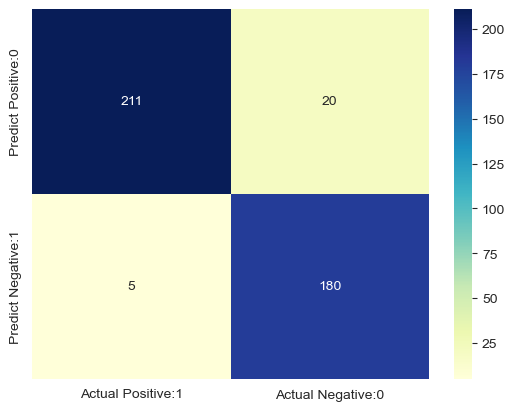

In [129]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],index=['Predict Positive:0', 'Predict Negative:1'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

<AxesSubplot:ylabel='FeatureName'>

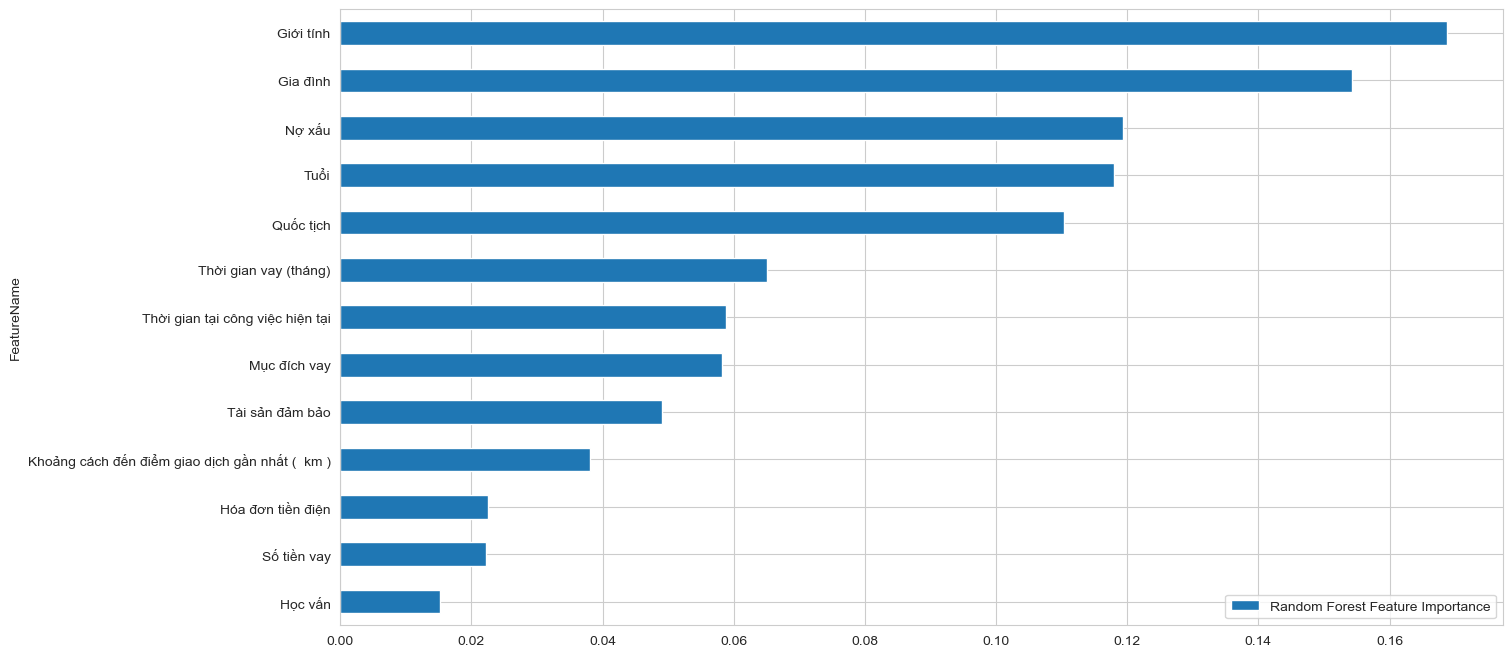

In [130]:
# Tìm kiếm các biến quan trọng
importance_rf = RF_classifier.feature_importances_
features_importances_rf = pd.DataFrame({'FeatureName': balanced_data.columns[0:len(balanced_data.columns)-1], 'Random Forest Feature Importance': importance_rf})
features_importances_rf.sort_values(by=['Random Forest Feature Importance'], ascending=False)
# Vẽ biểu đồ
features_importances_rf.sort_values("Random Forest Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Random Forest Feature Importance"], kind="barh")

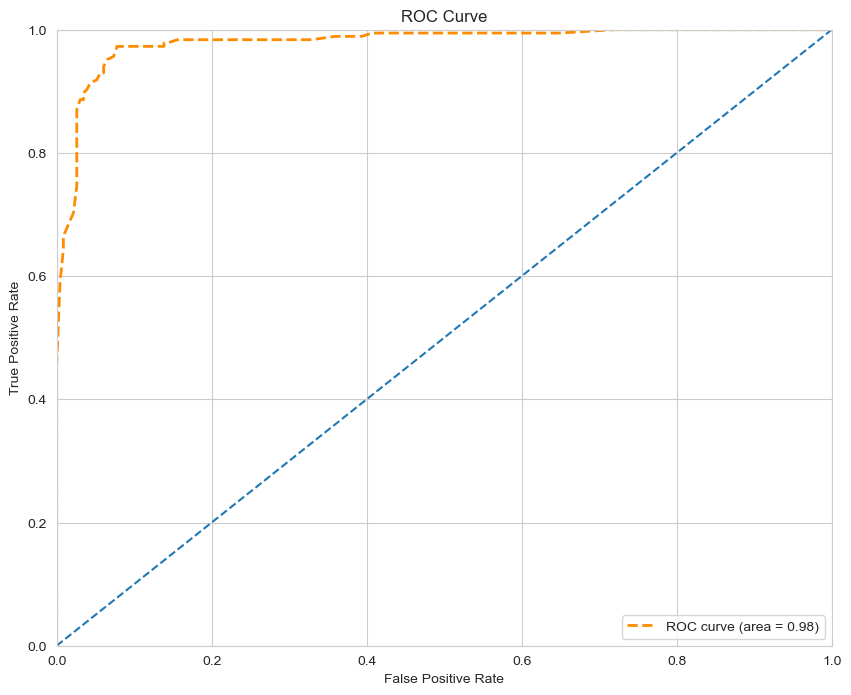

In [131]:
y_pred_prob_test = RF_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thres = roc_curve(y_test, y_pred_prob_test)
roc_auc = auc(fpr, tpr)

_plot_roc_curve(fpr, tpr, thres, roc_auc)

# Dự báo khách hàng mới so với bộ dữ liệu cũ

In [132]:
target = ['Khả năng trả nợ']
features = list(set(list(balanced_data.columns)) - set(target))

print('Target: ', target)
print('Features: ', features)

X = balanced_data[features].values
y = balanced_data[target].values 

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)


X = balanced_data[features].values
y = balanced_data[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state=42) 

Target:  ['Khả năng trả nợ']
Features:  ['Số tiền vay', 'Tuổi', 'Giới tính', 'Gia đình', 'Tài sản đảm bảo', 'Hóa đơn tiền điện', 'Mục đích vay', 'Nợ xấu', 'Khoảng cách đến điểm giao dịch gần nhất (  km )', 'Thời gian vay (tháng)', 'Học vấn', 'Quốc tịch', 'Thời gian tại công việc hiện tại']


In [133]:
RF_classifier = RandomForestClassifier()
RF_classifier.fit(X_train, y_train.ravel())

RandomForestClassifier()

In [134]:
sample_test = [1, 1, 900000, 450000000, 4, 1, 2, 30, 1, 0, 2, 2, 6]
print(RF_classifier.predict([sample_test])) 

[0]


In [135]:
sample_test = [1, 1, 900000, 450000000, 4, 1, 2, 30, 1, 0, 2, 2, 6]
prediction = RF_classifier.predict([sample_test])[0]

if prediction == 0:
    print("Khách hàng trả trợ đúng hạn.")
else:
    print("Khách hàng trả nợ không đúng hạn.")

Khách hàng trả trợ đúng hạn.


So sánh Dececion tree và randomforest sau khi chuẩn hóa và cân bằng dữ liệu

In [136]:
target = ['Khả năng trả nợ']
features = list(set(list(balanced_data.columns)) - set(target))

print('Target: ', target)
print('Features: ', features)

X = balanced_data[features].values
y = balanced_data[target].values 

# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X = scaler.fit_transform(X)


Target:  ['Khả năng trả nợ']
Features:  ['Số tiền vay', 'Tuổi', 'Giới tính', 'Gia đình', 'Tài sản đảm bảo', 'Hóa đơn tiền điện', 'Mục đích vay', 'Nợ xấu', 'Khoảng cách đến điểm giao dịch gần nhất (  km )', 'Thời gian vay (tháng)', 'Học vấn', 'Quốc tịch', 'Thời gian tại công việc hiện tại']


In [137]:
models = [
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
]

In [138]:
import time
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

results = []
names = []
reports = []
times = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=42)
    
    start_time = time.time()
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy')
    end_time = time.time()
    
    y_pred = cross_val_predict(model, X, y, cv=kfold)
    report = classification_report(y, y_pred, output_dict=True)
    reports.append(report)
    
    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    
    results.append(cv_results)
    names.append(name)
    times.append(end_time - start_time)

    print(f"{name} - Mean Accuracy: {cv_results.mean():.3f}, Std Dev: {cv_results.std():.3f}")
    print(f"{name} - Mean Time: {times[-1]:.3f} seconds")
    print(f"{name} - Precision: {precision:.3f}, Recall: {recall:.3f}")

Decision Tree - Mean Accuracy: 0.911, Std Dev: 0.012
Decision Tree - Mean Time: 0.097 seconds
Decision Tree - Precision: 0.916, Recall: 0.913
Random Forest - Mean Accuracy: 0.940, Std Dev: 0.008
Random Forest - Mean Time: 3.232 seconds
Random Forest - Precision: 0.943, Recall: 0.941


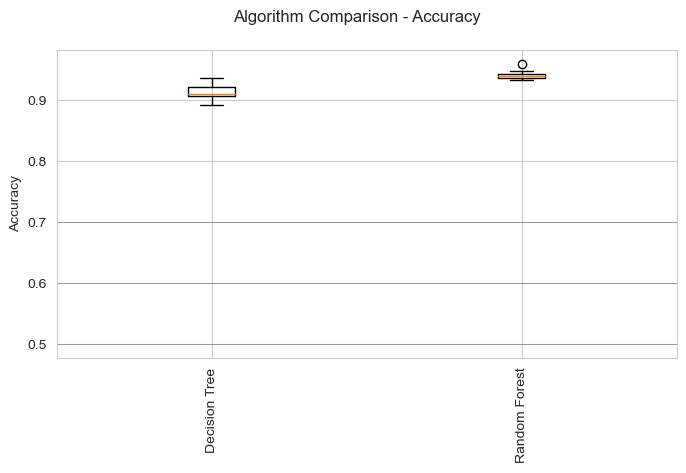

In [139]:
# plot the performance of each algorithm using a box plot
fig1 = plt.figure(figsize=(8, 4))
fig1.suptitle('Algorithm Comparison - Accuracy')
ax1 = fig1.add_subplot(111)
plt.boxplot(results)
ax1.set_xticklabels(names, rotation=90)
ax1.set_ylabel('Accuracy')

# Add horizontal lines at y-ticks
y_ticks = [0.5, 0.6, 0.7]
for y_tick in y_ticks:
    ax1.axhline(y=y_tick, color='grey', linewidth=0.5)
    
plt.show()

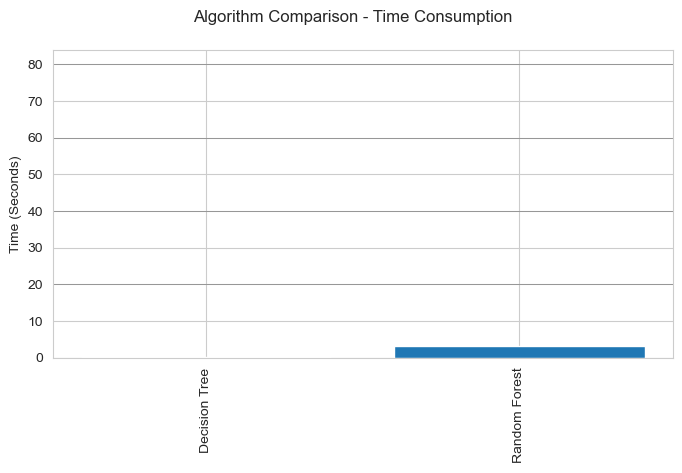

In [140]:
# plot the time consumption of each algorithm using a bar chart
fig2 = plt.figure(figsize=(8, 4))
fig2.suptitle('Algorithm Comparison - Time Consumption')
ax2 = fig2.add_subplot(111)
ax2.bar(names, times)
ax2.set_xticklabels(names, rotation=90)
ax2.set_ylabel('Time (Seconds)')

# Add horizontal lines at y-ticks
y_ticks = [20, 40, 60, 80]
for y_tick in y_ticks:
    ax2.axhline(y=y_tick, color='grey', linewidth=0.5)

plt.show()

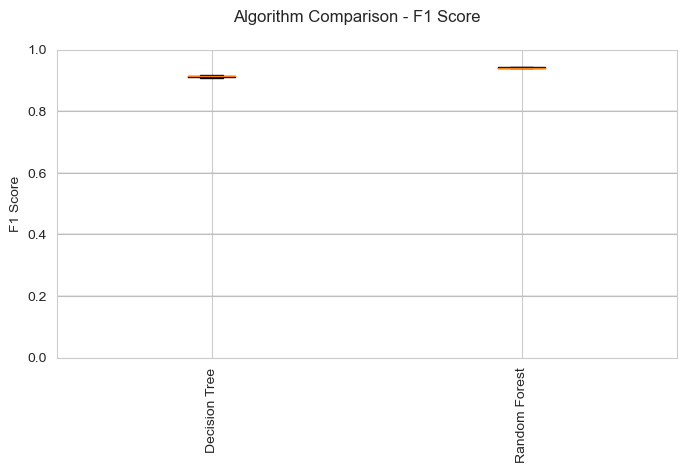

In [141]:
# compute and plot the f1 score for each algorithm using a box plot
f1_scores = []
for report in reports:
    f1_scores.append([report['0']['f1-score'], report['1']['f1-score']])

fig3 = plt.figure(figsize=(8, 4))
fig3.suptitle('Algorithm Comparison - F1 Score')
ax3 = fig3.add_subplot(111)
ax3.boxplot(f1_scores)
ax3.set_xticklabels(names, rotation=90)
ax3.set_ylabel('F1 Score')
ax3.set_ylim([0, 1])

# Add horizontal lines at y-ticks 0.2, 0.4, 0.6, 0.8
y_ticks = [0.2, 0.4, 0.6, 0.8]
for y_tick in y_ticks:
    ax3.axhline(y=y_tick, color='grey', linewidth=0.25)

plt.show()

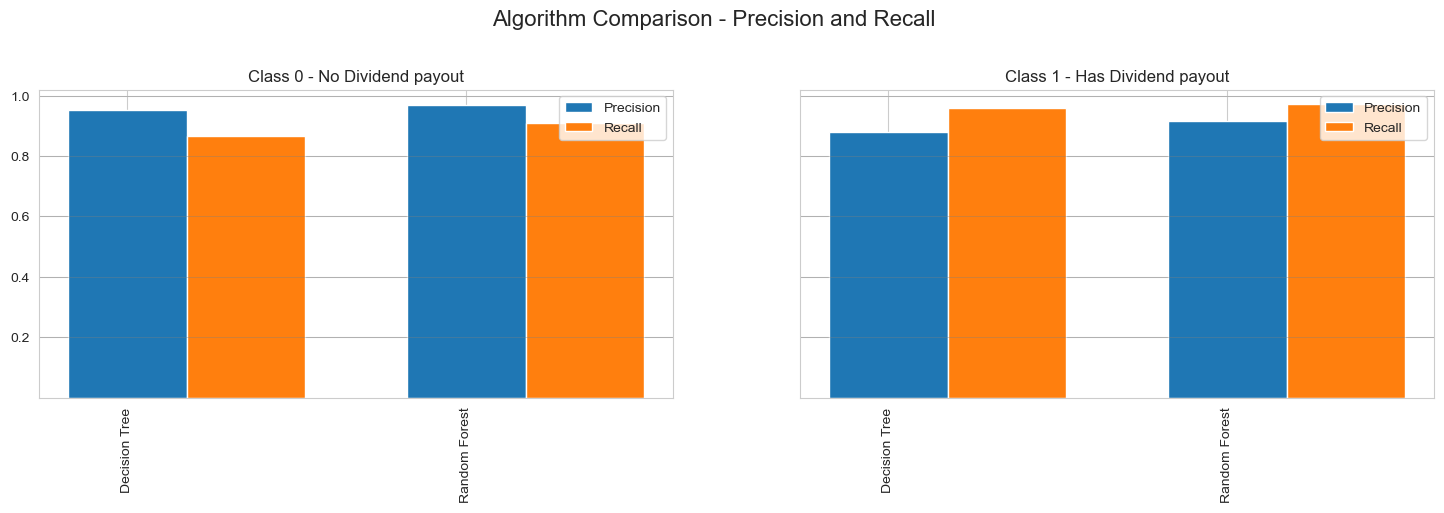

In [142]:
# compute and plot the precision and recall for each algorithm using a bar chart
precision_0 = []
recall_0 = []
precision_1 = []
recall_1 = []
for report in reports:
    precision_0.append(report['0']['precision'])
    precision_1.append(report['1']['precision'])
    recall_0.append(report['0']['recall'])
    recall_1.append(report['1']['recall'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 4), sharey=True)
fig.suptitle('Algorithm Comparison - Precision and Recall', fontsize=16, y=1.08)

# subplot for class 0
bar_width = 0.35
ax1.bar(names, precision_0, width=bar_width, label='Precision')
ax1.bar([x + bar_width for x in range(len(names))], recall_0, width=bar_width, label='Recall')
ax1.set_xticklabels(names, rotation=90)
ax1.set_title('Class 0 - No Dividend payout')
ax1.legend()

# subplot for class 1
ax2.bar(names, precision_1, width=bar_width, label='Precision')
ax2.bar([x + bar_width for x in range(len(names))], recall_1, width=bar_width, label='Recall')
ax2.set_xticklabels(names, rotation=90)
ax2.set_title('Class 1 - Has Dividend payout')
ax2.legend()

# set y-axis ticks
ax1.set_yticks([0.2, 0.4, 0.6, 0.8, 1])
ax2.set_yticks([0.2, 0.4, 0.6, 0.8, 1])

# add horizontal lines
for ax in (ax1, ax2):
    for y in [0.2, 0.4, 0.6, 0.8, 1]:
        ax.axhline(y=y, color='gray', alpha=0.5, linewidth=0.5)

plt.show()


In [143]:
# find the best algorithm based on accuracy and f1-score
best_acc_idx = max(range(len(results)), key=lambda i: results[i].mean())
best_f1_idx = f1_scores.index(max(f1_scores, key=lambda x: x[1])) 

y = balanced_data['Khả năng trả nợ']

In [144]:
print(f"Classification Report for the algorithm with highest F1-score: {names[best_f1_idx]}")

Classification Report for the algorithm with highest F1-score: Random Forest


In [145]:
# compute the classification report for each algorithm
precision_0 = []
precision_1 = []
recall_0 = []
recall_1 = []
for report in reports:
    precision_0.append(report['0']['precision'])
    precision_1.append(report['1']['precision'])
    recall_0.append(report['0']['recall'])
    recall_1.append(report['1']['recall'])

# find the best algorithm based on precision for each class
best_prec_0_idx = precision_0.index(max(precision_0))
best_prec_1_idx = precision_1.index(max(precision_1))

# find the best algorithm based on recall for each class
best_recall_0_idx = recall_0.index(max(recall_0))
best_recall_1_idx = recall_1.index(max(recall_1))

# generate the classification reports for the best algorithms for each metric
print(f"Classification Report for Algorithm with Highest Precision for Class 0 ({names[best_prec_0_idx]}):")
print(f"Classification Report for Algorithm with Highest Precision for Class 1 ({names[best_prec_1_idx]}):")
print(f"Classification Report for Algorithm with Highest Recall for Class 0 ({names[best_recall_0_idx]}):")
print(f"Classification Report for Algorithm with Highest Recall for Class 1 ({names[best_recall_1_idx]}):")
print(f"Classification Report for the algorithm with highest accuracy: {names[best_acc_idx]}")
print(f"Classification Report for the algorithm with highest F1-score: {names[best_f1_idx]}")


Classification Report for Algorithm with Highest Precision for Class 0 (Random Forest):
Classification Report for Algorithm with Highest Precision for Class 1 (Random Forest):
Classification Report for Algorithm with Highest Recall for Class 0 (Random Forest):
Classification Report for Algorithm with Highest Recall for Class 1 (Random Forest):
Classification Report for the algorithm with highest accuracy: Random Forest
Classification Report for the algorithm with highest F1-score: Random Forest
